시계열 데이터 - 베이징에서 기록한 기상정보, 미세먼지

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/PRSA_data_2010.1.1-2014.12.31.csv')
df.shape

(43824, 13)

In [15]:
df = df.set_index('No')
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0


In [8]:
# 평균값으로 누락값 채우기
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

In [10]:
df.isna().sum().sum()

0

In [22]:
df['pm2.5'].mean(), df['pm2.5'].std()
threshold = df['pm2.5'].mean() + df['pm2.5'].std()
threshold

188.4665103676712

In [28]:
df['y'] = (df['pm2.5'] > threshold).astype(np.int)

In [30]:
df['y'].mean()

0.13522270901788974

In [33]:
df.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
y          int32
dtype: object

In [34]:
df_valid = df.iloc[:, 4:]

In [36]:
df_dum = pd.get_dummies(df_valid)

In [37]:
df_dum.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,y,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
No,,,,,,,,,,,,
1,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,1,0,0
2,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,1,0,0
3,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,1,0,0
4,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,1,0,0
5,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,1,0,0


In [40]:
x = df_dum.iloc[:-24]
y = df_dum.iloc[24:]['pm2.5'] # 24 시간 뒤의 미세먼지 수치
x.shape, y.shape

((43800, 12), (43800,))

In [43]:
# Linear Regression , 결정계수 1, 0은 평균값, - 평균도 안나옴
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
model.score(x, y)

0.18603154605095806

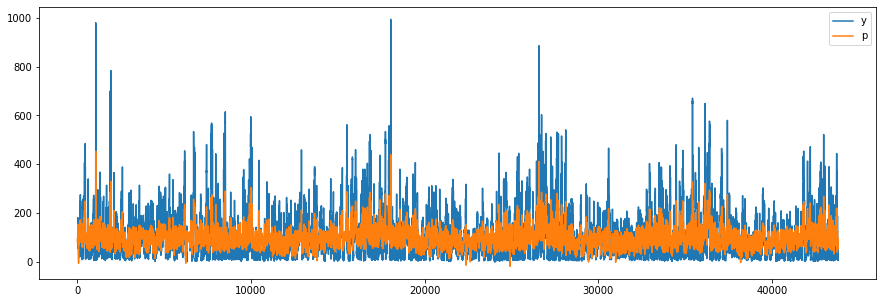

In [49]:
# 정답과 예측을 그래프로 비교해보자
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(y, label='y')
plt.plot(model.predict(x), label='p')
plt.legend()

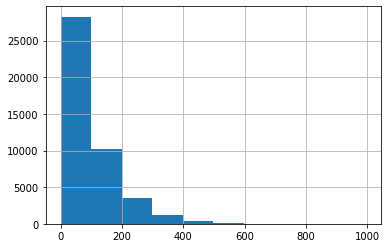

In [19]:
df['pm2.5'].hist()

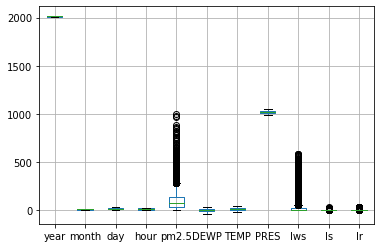

In [16]:
%matplotlib inline
df.boxplot()